## Dataset: https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [2]:
citrus_data = pd.read_csv("./citrus.csv")

In [3]:
citrus_data.shape

(10000, 6)

In [4]:
citrus_data

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [5]:
citrus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


## Label Encoding

In [6]:
label_encoder = preprocessing.LabelEncoder()

In [7]:
citrus_data['name']= label_encoder.fit_transform(citrus_data['name'])

In [8]:
citrus_data

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,0,15.35,253.89,149,77,20
9996,0,15.41,254.67,148,68,7
9997,0,15.59,256.50,168,82,20
9998,0,15.92,260.14,142,72,11


###  2. For given Dataset, perform classification using a Single layer Neural Network, show results with appropriate visualizations.

### Single Layer

In [9]:
singleLayer = MLPClassifier(hidden_layer_sizes=1)

In [10]:
citrus_data.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [11]:
columns = ['diameter', 'weight', 'red', 'green', 'blue']

In [12]:
X = citrus_data[columns]
y = citrus_data['name']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
singleLayer.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=1)

In [15]:
predict = singleLayer.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.493

### 3. Design a Neural Network (using multiple layers) for Binary Classification for Dataset.

In [17]:
multilayer = MLPClassifier(hidden_layer_sizes=5)

In [18]:
multilayer.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=5)

In [19]:
predict = multilayer.predict(X_test)

In [20]:
accuracy_score(y_test, predict)

0.923

In [21]:
output = {"layer" : [], "accuracy" : []}
for i in range(1, 10):
    mlp = MLPClassifier(hidden_layer_sizes=i)
    mlp.fit(X_train, y_train)
    predict = mlp.predict(X_test)
    output["layer"].append(i)
    output["accuracy"].append(accuracy_score(y_test, predict))

c:\users\nihar\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
outputDataframe = pd.DataFrame(output)

In [23]:
outputDataframe

,layer,accuracy
0,1,0.5090
1,2,0.4930
2,3,0.9245
3,4,0.9245
4,5,0.9240
5,6,0.9200
6,7,0.9205
7,8,0.9235
8,9,0.9220


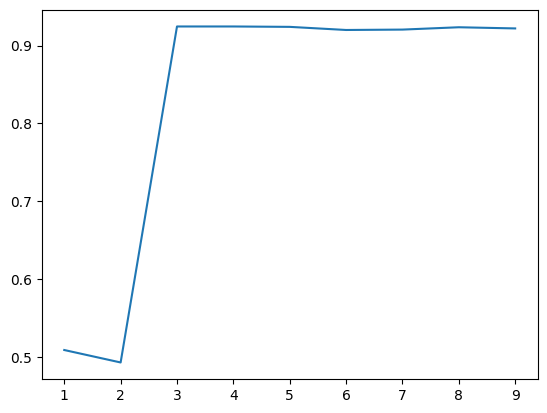

In [24]:
plt.plot(output["layer"], output["accuracy"])

### 4. Comment on the performance of Single / Multiple Neural Network for the given dataset.
### For the single layer we are getting accuracy around 5 but after increasing number of hidden layers we are getting increase in accuracy. But after some point we get constant accuracy.